Epoche 1/10 - Loss: 0.3397, Accuracy: 0.8992, Test Accuracy: 0.9445
Epoche 2/10 - Loss: 0.1714, Accuracy: 0.9483, Test Accuracy: 0.9592
Epoche 3/10 - Loss: 0.1293, Accuracy: 0.9603, Test Accuracy: 0.9626
Epoche 4/10 - Loss: 0.1084, Accuracy: 0.9665, Test Accuracy: 0.9570
Epoche 5/10 - Loss: 0.0942, Accuracy: 0.9708, Test Accuracy: 0.9643
Epoche 6/10 - Loss: 0.0836, Accuracy: 0.9737, Test Accuracy: 0.9657
Epoche 7/10 - Loss: 0.0769, Accuracy: 0.9761, Test Accuracy: 0.9725
Epoche 8/10 - Loss: 0.0699, Accuracy: 0.9774, Test Accuracy: 0.9673
Epoche 9/10 - Loss: 0.0642, Accuracy: 0.9795, Test Accuracy: 0.9669
Epoche 10/10 - Loss: 0.0603, Accuracy: 0.9805, Test Accuracy: 0.9707


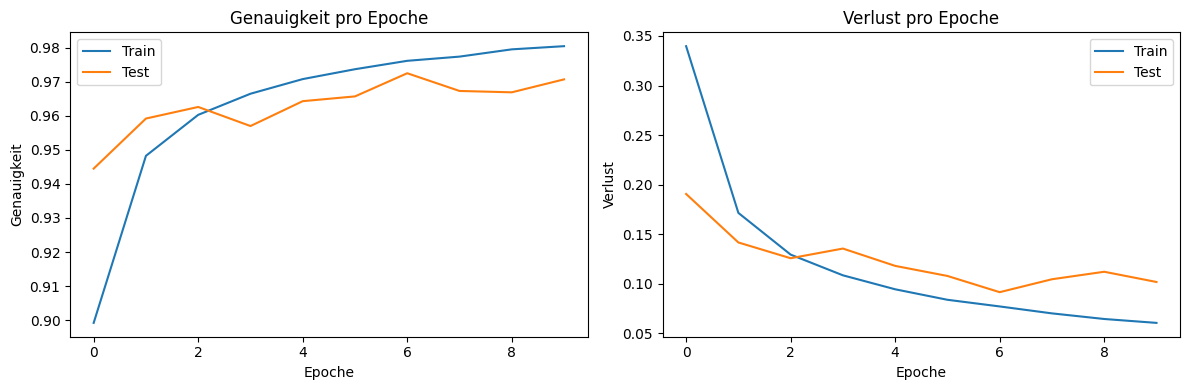

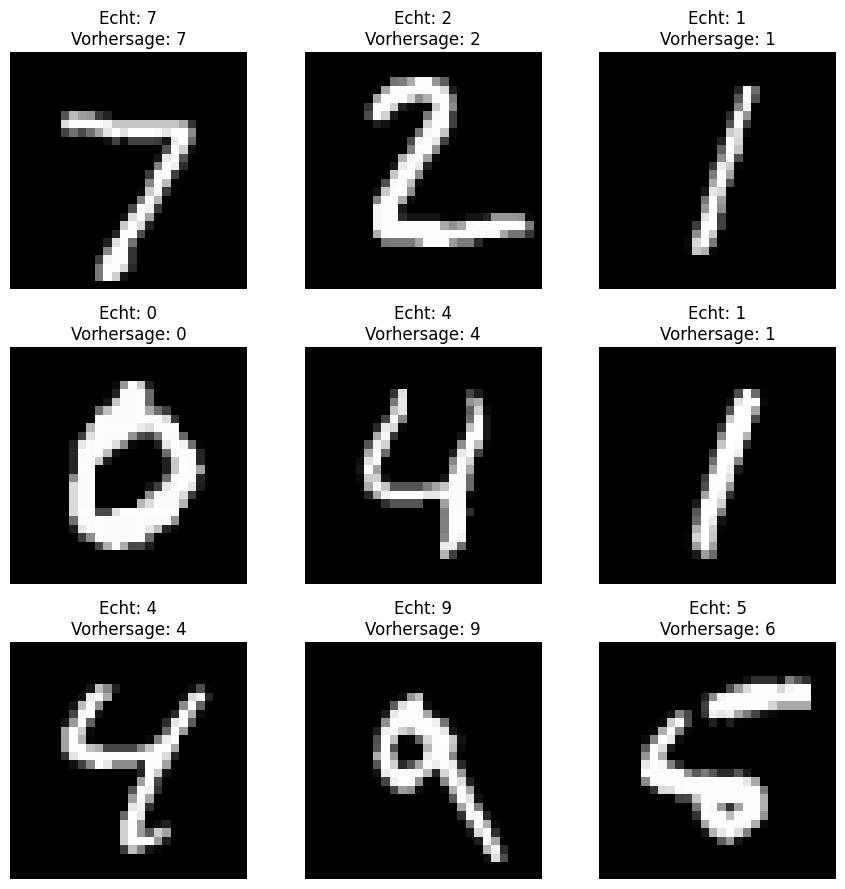

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 1. Transformation: Normalisierung der Bilder
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# 2. Daten laden
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# 3. Einfaches neuronales Netzwerk
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()

# 4. Verlustfunktion & Optimierer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 5. Training
epochs = 10
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        preds = output.argmax(dim=1)
        correct += (preds == labels).sum().item()
    
    avg_loss = running_loss / len(train_loader)
    accuracy = correct / len(train_loader.dataset)
    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)

    # Testdaten evaluieren
    model.eval()
    test_loss = 0.0
    correct = 0
    with torch.no_grad():
        for images, labels in test_loader:
            output = model(images)
            loss = criterion(output, labels)
            test_loss += loss.item()
            preds = output.argmax(dim=1)
            correct += (preds == labels).sum().item()
    test_losses.append(test_loss / len(test_loader))
    test_accuracies.append(correct / len(test_loader.dataset))

    print(f"Epoche {epoch+1}/{epochs} - Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}, Test Accuracy: {test_accuracies[-1]:.4f}")

# 6. Lernkurven plotten
plt.figure(figsize=(12, 4))

# Genauigkeit
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Train')
plt.plot(test_accuracies, label='Test')
plt.title('Genauigkeit pro Epoche')
plt.xlabel('Epoche')
plt.ylabel('Genauigkeit')
plt.legend()

# Verlust
plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Train')
plt.plot(test_losses, label='Test')
plt.title('Verlust pro Epoche')
plt.xlabel('Epoche')
plt.ylabel('Verlust')
plt.legend()

plt.tight_layout()
plt.show()

# 7. Beispiel-Vorhersagen anzeigen
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

model.eval()
with torch.no_grad():
    output = model(example_data[:9])
    preds = output.argmax(dim=1)

plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.title(f"Echt: {example_targets[i]}\nVorhersage: {preds[i].item()}")
    plt.axis('off')
plt.tight_layout()
plt.show()
